In [1]:
import pickle
from scipy import stats
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances 
from sklearn.metrics import roc_auc_score, jaccard_score
from scipy.spatial.distance import dice
import sys
sys.path.append('../../')
import lightgbm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import  pandas as pd

In [61]:
color_list = {
    'lpi': 'blue',
    'lirme': 'gold',
    'lime': 'darkorange',
    'shap': 'brown',
    'exs_top_k_rank': 'cyan', 
    'exs_top_k_binary': 'lightgreen', 
    'exs_score': 'magenta',
    'random_d': 'black',
    'pmi': 'turquoise',
    'greedy_score': 'blue',
    'rank_lime': 'green'
}

In [2]:
dataset_name = 'mq2008'

In [65]:
feat_names = np.array(['tf_body', 'tf_anchor', 'tf_title', 'tf_url', 'tf_all_document', 'idf_body', 
            'idf_anchor', 'idf_title', 'idf_url', 'idf_all_document', 'tfidf_body', 'tfidf_anchor',
            'tfidf_title', 'tf_idf_url', 'tfidf_all_document', 'dl_body' , 'dl_anchor', 'dl_title', 'dl_url', 
            'dl_all_document', 'okapi_body', 'okapi_anchor', 'okapi_title', 'okapi_url','okapi_all_document', 
            'lmirabs_body', 'lmirabs_anchor', 'lmirabs_title', 'lmirabs_url', 'lmirabs_all_document', 'lmirdir_body', 'lmirdir_anchor',
            'lmirdir_title', 'lmirdir_url', 'lmirdir_document', 'lmirjm_body', 'lmirjm_anchor', 'lmirjm_title', 'lmirjm_url', 
            'lmirjm_all_document', 'pagerank', 'inlink_number', 'outlink_number', 'num_slash_in_url', 'length_url', 'num_child'])


In [44]:
exps = pickle.load( open( "./exps/{}_pointwise_exps_v3.p".format(dataset_name), "rb"))
lpi_exps = pickle.load( open( "./exps/{}_pointwise_exps_v4.p".format(dataset_name), "rb"))
for q in exps.keys():
    exps[q]['lpi'] = np.array(lpi_exps[q]['lpi'])

In [37]:
test_sample = pickle.load( open( "./data/{}_test_sample.p".format(dataset_name), "rb" ) )

background_dict = pickle.load( open( "./data/{}_background.p".format(dataset_name), "rb" ) )

In [38]:
background = []
for q in background_dict:
    background.extend(background_dict[q])
    
background = np.array(background).reshape(-1, test_sample[list(test_sample.keys())[0]].shape[1])

In [39]:
queries = list(exps.keys())

In [40]:
exp_names = list(exps[queries[0]].keys())

In [41]:
ranker = lightgbm.Booster(model_file='./models/lmart_{}.txt'.format(dataset_name))
ranker.params['objective'] = 'binary'

In [80]:
exp_names = ['lirme','exs_score', 'exs_top_k_binary', 'exs_top_k_rank', 'lpi', 'lime','shap', 'random_d']
exp_names_alt = ['LIRME','EXS (S)', 'EXS (B)', 'EXS (R)', 'LPI', 'LIME','SHAP', 'Random']

In [81]:
one_exp = {}
idx = 2
for s in exp_names:
    one_exp[s] = exps[queries[10]][s][idx]

In [93]:
queries[10]

18401

In [92]:
len(test_sample[queries[10]])

16

In [90]:
np.argsort(ranker.predict(test_sample[queries[10]]))[::-1] [idx]

3

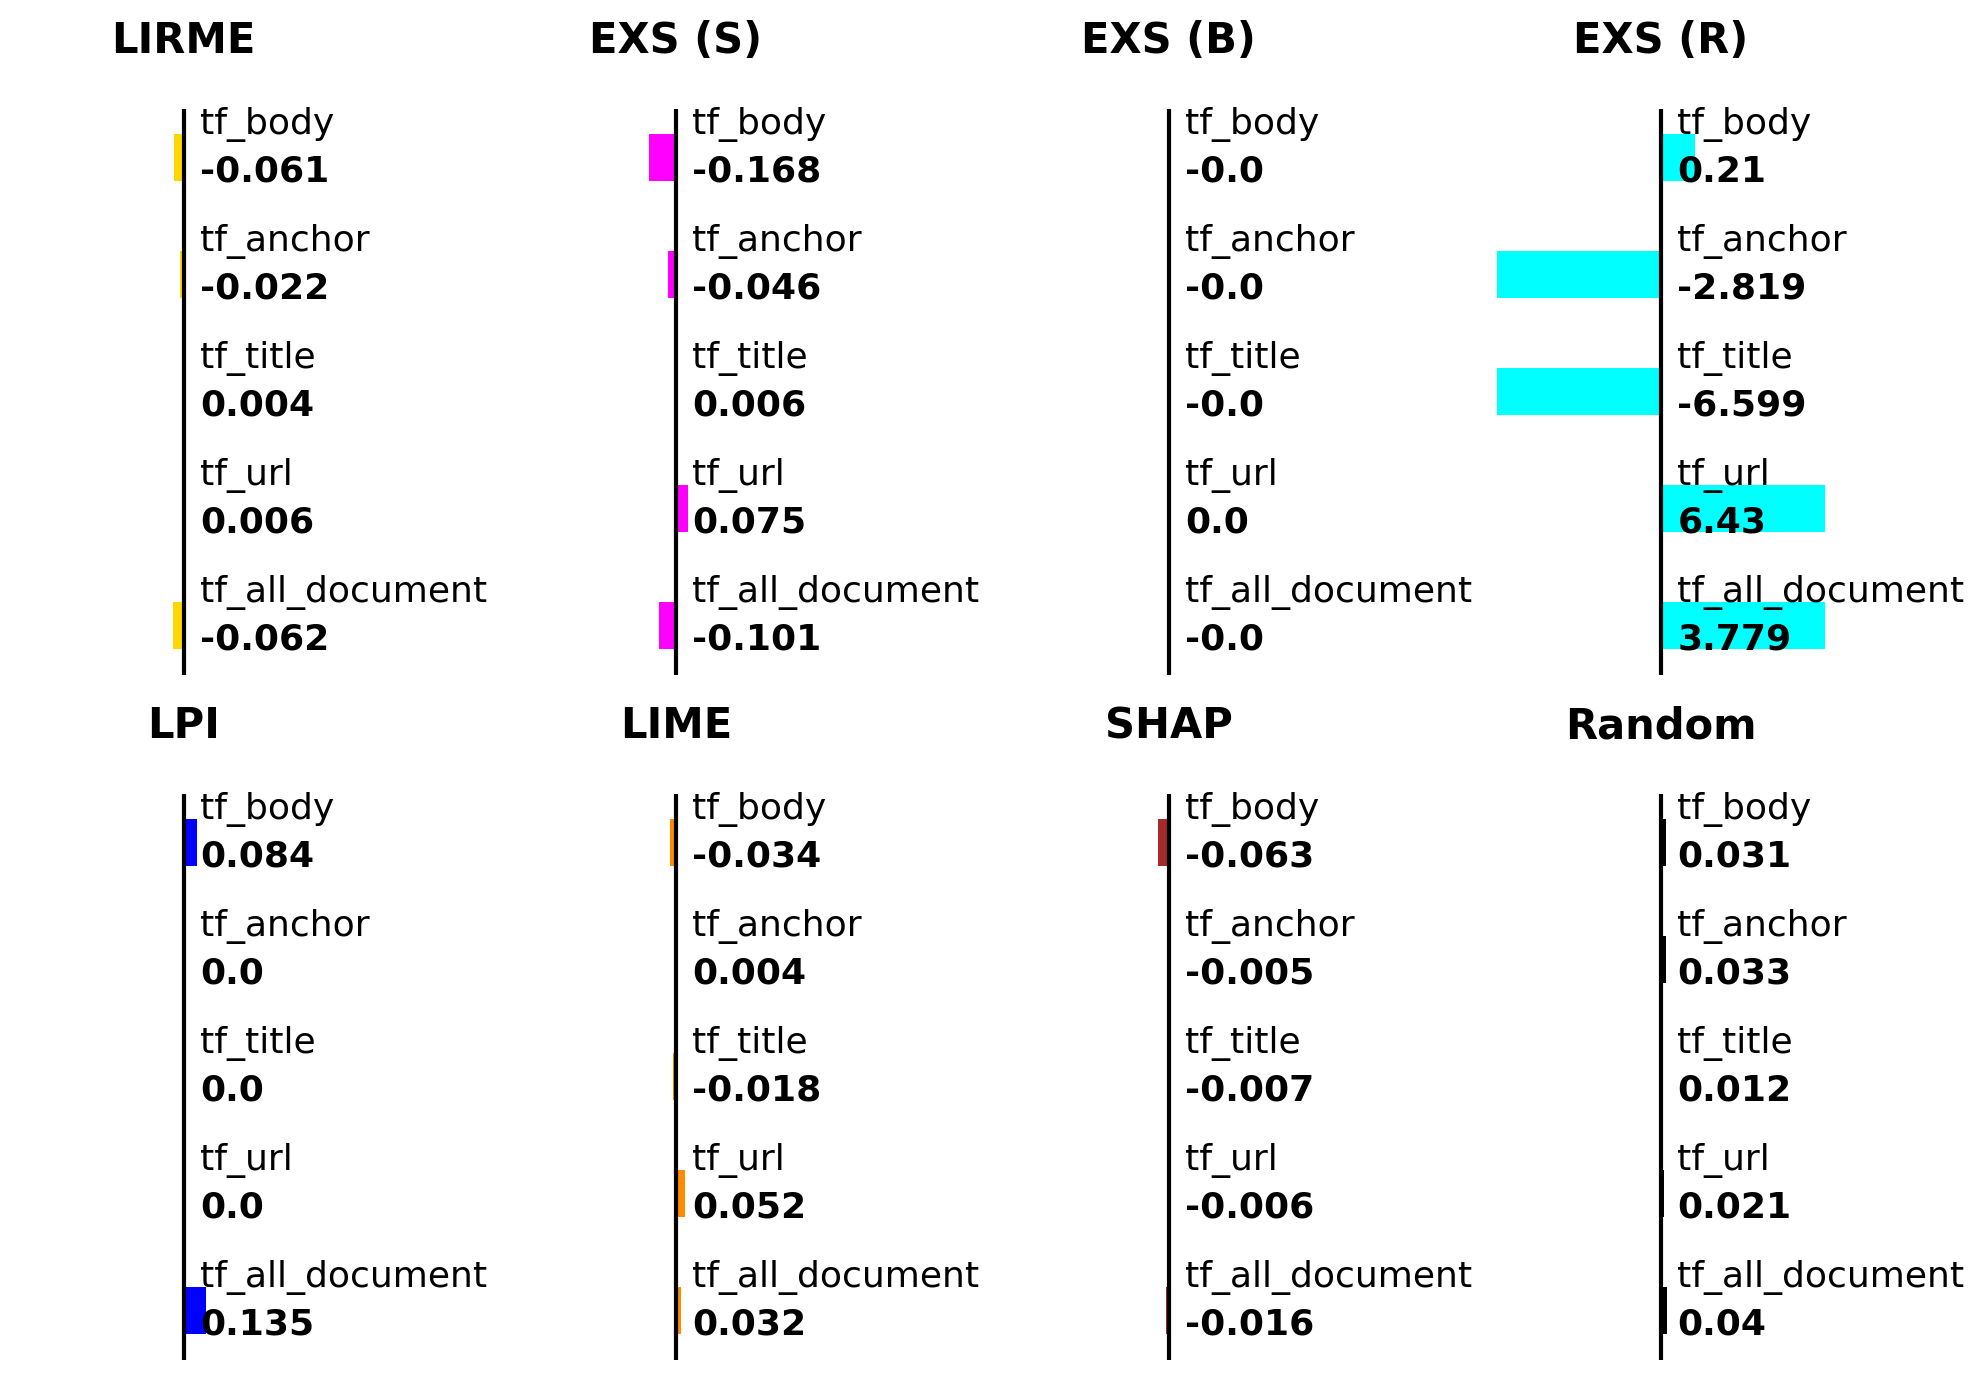

In [99]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=True, dpi=120)
fig, ax = plt.subplots(2, 4, figsize=(10, 7),  sharey=True, dpi=200)
ax = ax.ravel()
y_pos = np.arange(background.shape[1])
#titles = ['Greedy-Score', 'PMI', 'Grad', 'RPI']
#feat_names = ['tf_body', 'tf_anchor', 'tf_title', 'tf_url', 'tf_all_document']
ax[0].invert_yaxis() 
sel_range_feat = 5

for i in range(8):    
    ax[i].set_title(exp_names_alt[i], fontsize=15, fontweight='bold', pad=20)
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    #ax[i].set_ylabel('', labelpad=25)
    ax[i].tick_params(left = False, bottom = False)
    #ax[i].set_yticks(np.arange(len(features)))
    #ax[i].set_yticklabels(features, fontsize=17)
    ax[i].set_yticklabels([])
    ax[i].set_xlim([-1, 1])
    ax[i].barh(y_pos[:sel_range_feat], one_exp[exp_names[i]][:sel_range_feat], align='center', height=0.4, color=color_list[exp_names[i]])
    #ax[i].set_yticks(y_pos)
    #ax[i].set_yticklabels(features, fontsize= 18)
    ax[i].axvline(x=0, c='black')

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    padding = 0.2
    
    for j in range(0, 5):
        x_pos_ = 0.1
        
        ax[i].text(x_pos_, j + padding, np.round(one_exp[exp_names[i]][j], 3), color='black', fontweight='bold', fontsize=13)
        ax[i].text(x_pos_, j - padding, feat_names[j], color='black',  fontsize=13)
plt.tight_layout()      
plt.savefig("./img/query_exp_example.pdf", bbox_inches='tight')

In [48]:
y_pos[:sel_range_feat], one_exp[exp_names_alt[i]][:sel_range_feat]

(array([0, 1, 2, 3, 4]),
 [array([-5.16063750e-02, -3.95195107e-03,  7.22597987e-03,  4.39548684e-03,
         -4.80783615e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.35431886e-02,  6.41373290e-02,
          2.74647440e-02, -2.37256670e-02, -1.52598010e-02,  2.10501847e-01,
          6.04882434e-02,  9.41947282e-03, -1.51515612e-01,  4.51299461e-02,
          2.22763846e-04,  1.59540210e-02,  1.26559700e-01,  3.02101822e-02,
          5.95221164e-02, -1.42302617e-01,  3.96584215e-02,  7.87093780e-02,
          1.46273576e-01,  1.52478408e-02, -1.81989446e-02,  2.02471645e-02,
         -7.25675219e-03,  1.65771745e-02, -1.12381526e-01, -5.06929191e-02,
          1.68801537e-01, -6.99450561e-03,  4.19210936e-01,  3.20397897e-01,
         -9.98746634e-02, -2.71764157e-02,  0.00000000e+00, -7.03745771e-02,
          8.87112322e-02, -8.12372722e-02]),
  array([-5.62332836e-02, -1.53860606e-02,  5.92056342e-03, -2.64230768e-03,
      

In [362]:
#exps_yahoo = pickle.load(open( "./save/exps_yahoo_200_1675497465.696698.p", "rb" ) )
#exps_web10k = pickle.load(open( "./save/exps_web10k_200_1675464327.034055.p", "rb" ) )
#exps_mq2008 = pickle.load(open( "./save/exps_mq2008_200_1675505826.393946.p", "rb" ) )

q_exp = pickle.load( open( "../save/query_exp_all_v5_top.p", "rb" ) )

In [363]:
greedy = pickle.load(open( "../save/query_greedy_score_v1.p", "rb" ) )

In [364]:
for d in q_exp.keys():
    q_exp[d]['greedy'] = greedy[d]

In [387]:
idx = 0

In [388]:
exp_greedy = q_exp['mq2008']['greedy'][idx]
exp_pmi = q_exp['mq2008']['pmi'][idx]
exp_grad = q_exp['mq2008']['grad'][idx]
exp_rpi = q_exp['mq2008']['rpi'][idx]
#exp_lirme = q_exp['mq2008']['lirme'][idx]
#exp_exs = q_exp['mq2008']['exs_v2'][idx]
exp_vals = [exp_greedy,exp_pmi, exp_grad,  exp_rpi]

In [389]:
#exp_lirme = exps_mq2008['lirme'][3]
#exp_exs = exps_mq2008['exs_v1'][3]
#exp_shap = exps_mq2008['lime'][3]
#exp_lime = exps_mq2008['shap'][3]

In [405]:
top_k = 5
important_features = np.argsort(np.abs(exp_rpi))[-top_k:][::-1]
#important_features = np.arange(10, 15)

In [406]:
exp_grad /= np.sum(exp_grad)
#exp_grad

In [444]:
exps = []
sel_features = []

for e in exp_vals: 
    f_selected = np.argsort(np.abs(e))[-top_k:][::-1]
    exps.append(e[f_selected])
    sel_features.append(np.array(feat_names)[important_features])

In [421]:
#exps = [exp_greedy[important_features], exp_pmi[important_features], 
#        exp_grad[important_features], exp_rpi[important_features]]

In [422]:
feat_names = ['tf_body', 'tf_anchor', 'tf_title', 'tf_url', 'tf_all_document', 'idf_body', 
            'idf_anchor', 'idf_title', 'idf_url', 'idf_all_document', 'tfidf_body', 'tfidf_anchor',
            'tfidf_title', 'tf_idf_url', 'tfidf_all_document', 'dl_body' , 'dl_anchor', 'dl_title', 'dl_url', 
            'dl_all_document', 'okapi_body', 'okapi_anchor', 'okapi_title', 'okapi_url','okapi_all_document', 
            'lmirabs_body', 'lmirabs_anchor', 'lmirabs_title', 'lmirabs_url', 'lmirabs_all_document', 'lmirdir_body', 'lmirdir_anchor',
            'lmirdir_title', 'lmirdir_url', 'lmirdir_document', 'lmirjm_body', 'lmirjm_anchor', 'lmirjm_title', 'lmirjm_url', 
            'lmirjm_all_document', 'pagerank', 'inlink_number', 'outlink_number', 'num_slash_in_url', 'length_url', 'num_child']

In [423]:
sel_feat_names = np.array(feat_names)[important_features]
#sel_feat_names = np.arange(0, 5)

In [424]:
sel_feat_names

array(['tfidf_title', 'dl_title', 'idf_url', 'idf_title', 'idf_anchor'],
      dtype='<U20')

In [425]:
import sklearn

dataset_name = 'mq2008'

X_train, y_train, qids_train, X_valid, y_valid, qids_valid, all_feat_names, test_q_info = get_data(dataset_name, training=False)

scaler = sklearn.preprocessing.StandardScaler(with_mean=False)
valid_scaled = scaler.fit_transform(X_valid)
train_scaled = scaler.fit_transform(X_train)

In [426]:
ranker = lightgbm.Booster(model_file='../../model/save/lmart_{}.txt'.format(dataset_name))

In [427]:
i= 3
all_related_docs = np.argwhere(test_q_info[i] == test_q_info).flatten()
all_related_docs_preds = ranker.predict(valid_scaled[all_related_docs])

In [428]:
np.argsort(all_related_docs_preds)[::-1]

array([0, 3, 6, 7, 4, 5, 2, 1])

In [429]:
exp_rpi

array([0.02138584, 0.02217791, 0.02217791, 0.02217791, 0.02162346,
       0.02217791, 0.02217791, 0.02217791, 0.02217791, 0.02217791,
       0.0220987 , 0.02217791, 0.02217791, 0.02217791, 0.02019774,
       0.02162346, 0.02217791, 0.02217791, 0.02194029, 0.0220987 ,
       0.01932647, 0.02138584, 0.02194029, 0.02088966, 0.02186108,
       0.02217791, 0.02217791, 0.02217791, 0.02170267, 0.0220987 ,
       0.02217791, 0.02217791, 0.02217791, 0.02217791, 0.02217791,
       0.02217791, 0.02186108, 0.0220195 , 0.01866988, 0.02025544,
       0.02162346, 0.02170267, 0.02217791, 0.02122743, 0.02075219,
       0.02162346])

In [430]:
sel_feats = []
for s in sel_feat_names:
    temp = s.title().replace("_", " ")
    sel_feats.append(temp)

In [417]:
exp_colors = ['dimgray', 'gold','red', 'turquoise', 'magenta', 'brown']
#colors = ['turquoise', 'gold', 'red', 'dimgray', 'blue', 'lightgreen', 'magenta', 'darkorange', 'brown', 'black']
#exp_names_alt = ['RPI', 'PMI', 'Grad', 'Greedy', 'LIME', 'SHAP', 'LIRME', 'EXS (Top-k)', 'EXS (Binary)', 'Random']



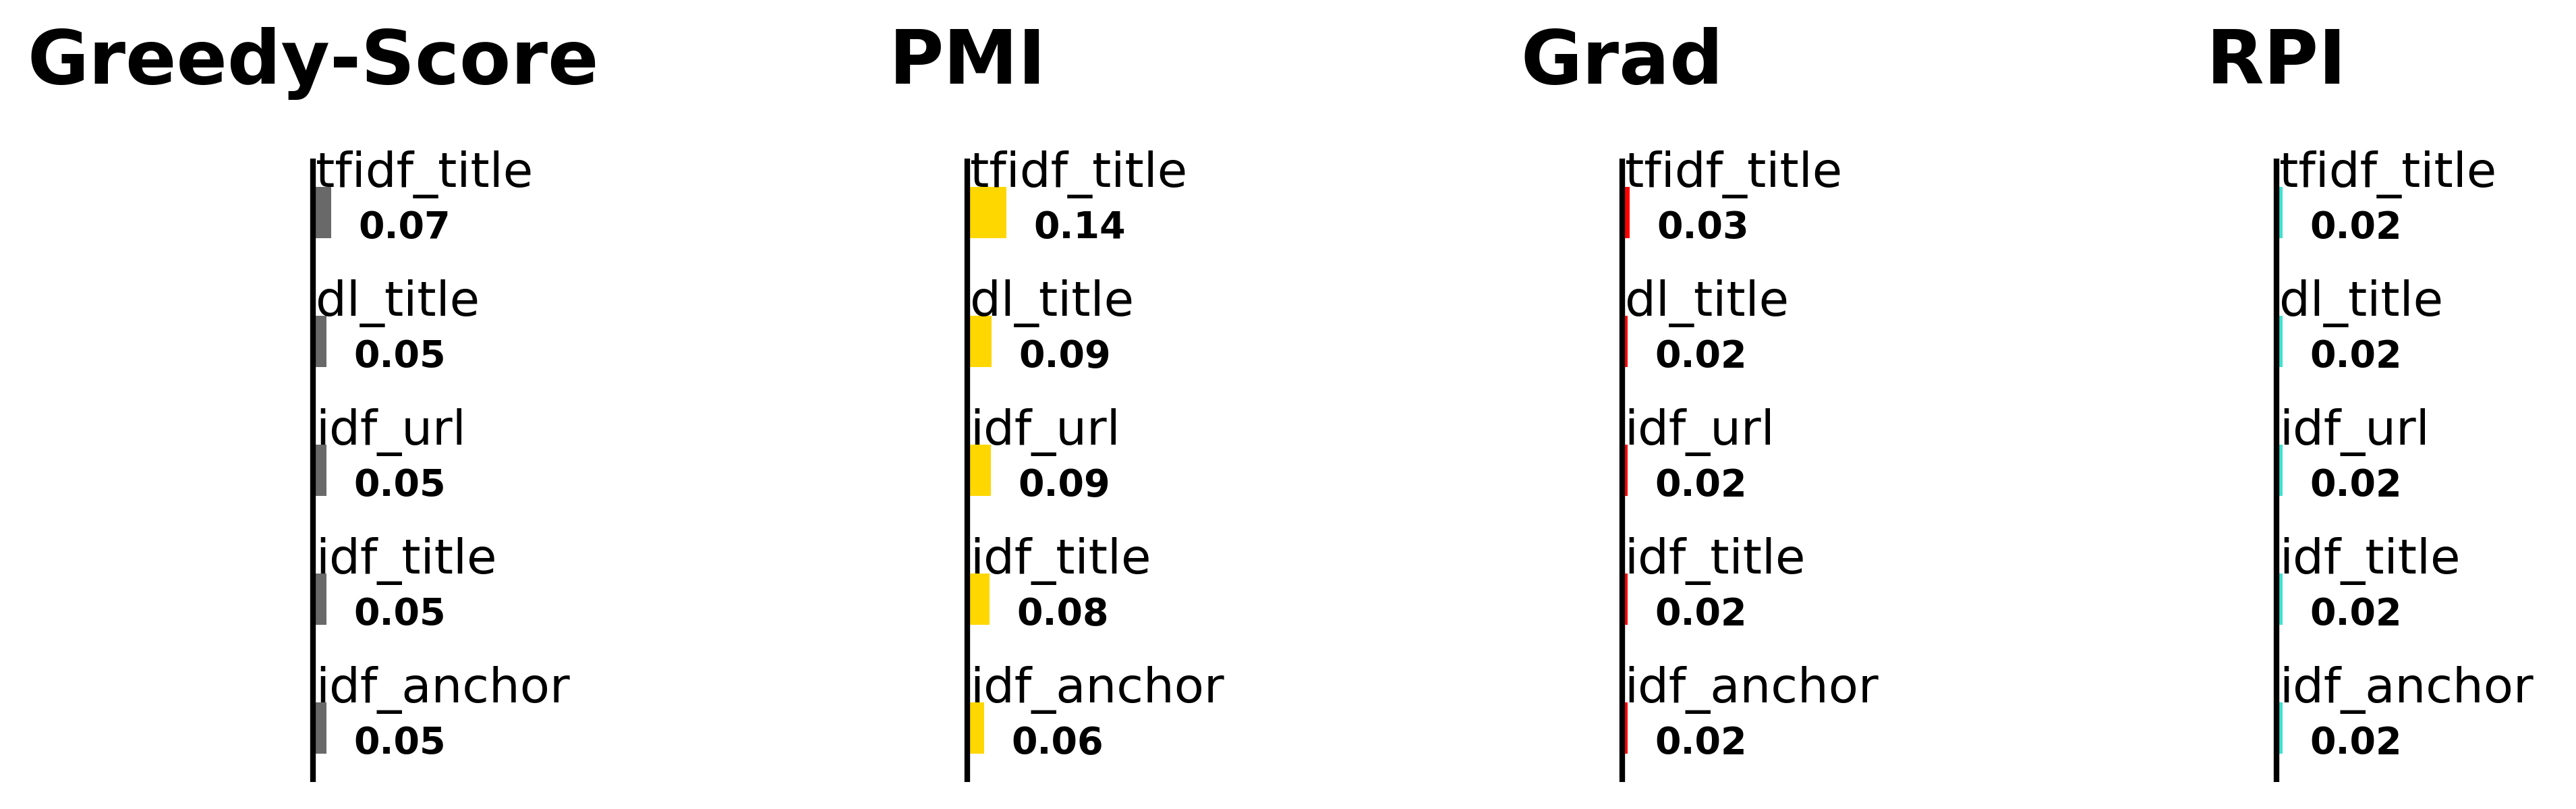

In [449]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=True, dpi=120)
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True, dpi=400)
ax = ax.ravel()
y_pos = np.arange(len(sel_feat_names))
titles = ['Greedy-Score', 'PMI', 'Grad', 'RPI']

ax[0].invert_yaxis() 

for i in range(4):    
    ax[i].set_title(titles[i], fontsize=20, fontweight='bold', pad=20)
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    #ax[i].set_ylabel('', labelpad=25)
    ax[i].tick_params(left = False, bottom = False)
    #ax[i].set_yticks(np.arange(len(features)))
    #ax[i].set_yticklabels(features, fontsize=17)
    ax[i].set_yticklabels([])
    ax[i].set_xlim([-1, 1])
    ax[i].barh(y_pos, exps[i], align='center', height=0.4, color=exp_colors[i % 4])
    #ax[i].set_yticks(y_pos)
    #ax[i].set_yticklabels(features, fontsize= 18)
    ax[i].axvline(x=0, c='black')

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    padding = 0.2
    #for j in range(len(sel_feats)):
    for j in range(len(sel_features[i])):
        
        if exps[i][j] < 0:
            x_pos_ = 0.1
        else: 
            x_pos_ = exps[i][j] + 0.1
        
        ax[i].text(x_pos_, j + padding, np.round(exps[i][j], 2), color='black', fontweight='bold', fontsize=10)
        ax[i].text(0.01, j - padding, sel_features[i][j], color='black',  fontsize=13)
        
plt.savefig("../../img/query_exp_example.eps", bbox_inches='tight')

In [353]:
len(list(q_exp[d_name].keys()))

10

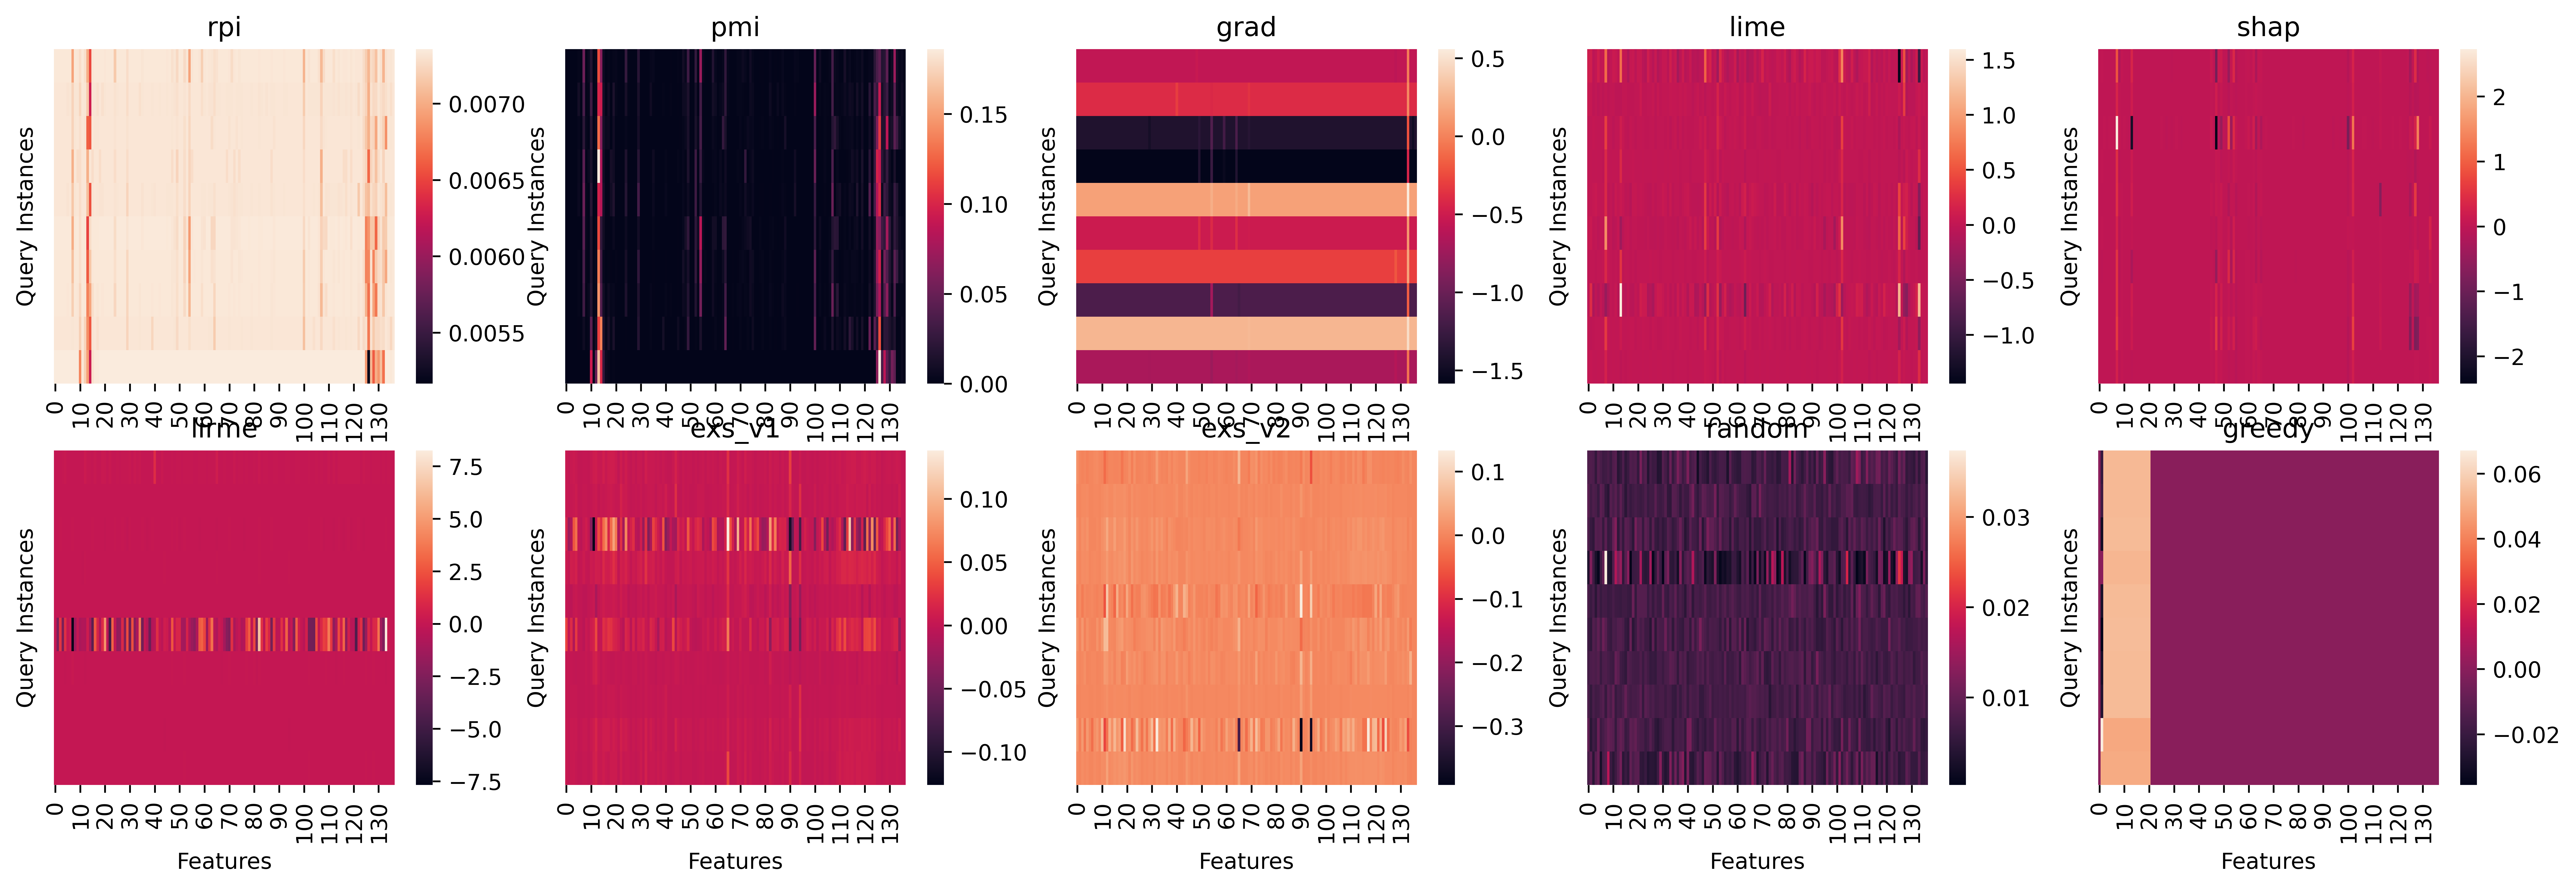

In [360]:
fig, ax = plt.subplots(2, 5, figsize=(20, 6), dpi=600)
cbar_check=False
d_name = 'web10k'
ax = ax.ravel()
e_names = list(q_exp[d_name].keys())

for i in range(len(e_names)):
    val = q_exp[d_name][e_names[i]]
    s = sns.heatmap(np.nan_to_num(val), ax=ax[i])
    ax[i].set_yticks([])
    ax[i].set_ylabel('Query Instances')
    ax[i].set_xlabel('Features')
    s.set_xticklabels(s.get_xmajorticklabels(), fontsize = 10, rotation=90)
    #s.set_yticks(np.arange(0, 7))
    s.set_yticklabels(s.get_ymajorticklabels(), fontsize = 12)
    ax[i].set_title(e_names[i])
plt.show()